In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()


Saving cs-test.csv to cs-test.csv
Saving cs-training.csv to cs-training.csv


In [3]:
train = pd.read_csv("cs-training.csv").drop(['Unnamed: 0'],axis=1)
test = pd.read_csv("/content/cs-test.csv").drop(['Unnamed: 0'],axis=1)

In [5]:
#train = pd.read_csv("/content/cs-training.csv").drop(['Unnamed: 0'],axis=1)

In [7]:
#test = pd.read_csv("/content/cs-test.csv").drop(['Unnamed: 0'],axis=1)

In [4]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


#EDA part of data

In [6]:
#Finding duplicates
train.duplicated().sum()

609

In [7]:
train.duplicated().value_counts()

,count
False,149391
True,609


609 duplicate values are present in data

In [8]:
train_main = train.drop_duplicates()

Duplicates have been deleted

In [9]:
train_main.duplicated().value_counts()

,count
False,149391


In [10]:
train_main.shape

(149391, 11)

In [11]:
test.shape

(101503, 11)

Check Null values

In [12]:
train_main.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29221
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


Monthly income and no of dependents have null values

In [13]:
def miss_val(df):
  return round(df.isnull().sum()/df.shape[0]*100,4)

In [14]:
miss_val(train_main)

,0
SeriousDlqin2yrs,0.0000
RevolvingUtilizationOfUnsecuredLines,0.0000
age,0.0000
NumberOfTime30-59DaysPastDueNotWorse,0.0000
DebtRatio,0.0000
MonthlyIncome,19.5601
NumberOfOpenCreditLinesAndLoans,0.0000
NumberOfTimes90DaysLate,0.0000
NumberRealEstateLoansOrLines,0.0000
NumberOfTime60-89DaysPastDueNotWorse,0.0000


In [15]:
train_main[train_main.NumberOfDependents.isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


We can when no of dependents is null the monthly income is also null for these 3828 records


In [16]:
train_main[train_main.NumberOfDependents.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [17]:
train_main[train_main.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


When Income is null we do some values for no of dependents

### **Filling the missing values**

In [18]:
train_main['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [19]:
train_main.groupby(['NumberOfDependents']).size()

,0
NumberOfDependents,
0.0,86392
1.0,26314
2.0,19521
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


In [20]:
dep_miss = train_main[train_main['NumberOfDependents'].isnull()]
dep_nmiss= train_main[train_main['NumberOfDependents'].notnull()]

In [21]:
dep_miss.shape

(3828, 11)

In [22]:
dep_nmiss.shape

(145563, 11)

Since 0 is common value for number of dependent we will both the columns with 0 value

In [23]:
dep_miss['NumberOfDependents'] = dep_miss['NumberOfDependents'].fillna(0)
dep_miss['MonthlyIncome'] = dep_miss['MonthlyIncome'].fillna(0)

<ipython-input-23-1aa4aaac6cf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_miss['NumberOfDependents'] = dep_miss['NumberOfDependents'].fillna(0)
<ipython-input-23-1aa4aaac6cf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_miss['MonthlyIncome'] = dep_miss['MonthlyIncome'].fillna(0)


In [24]:
miss_val(dep_miss)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


Null vallues have been handled

In [25]:
miss_val(dep_nmiss)

,0
SeriousDlqin2yrs,0.0000
RevolvingUtilizationOfUnsecuredLines,0.0000
age,0.0000
NumberOfTime30-59DaysPastDueNotWorse,0.0000
DebtRatio,0.0000
MonthlyIncome,17.4447
NumberOfOpenCreditLinesAndLoans,0.0000
NumberOfTimes90DaysLate,0.0000
NumberRealEstateLoansOrLines,0.0000
NumberOfTime60-89DaysPastDueNotWorse,0.0000


In [26]:
dep_nmiss['MonthlyIncome'].agg(['min','mean','median'])

,MonthlyIncome
min,0.000000
mean,6675.098269
median,5400.000000


In [27]:
dep_nmiss['MonthlyIncome'].agg(['max'])

,MonthlyIncome
max,3008750.0


The data has alot outliers, the median and mean varies and low value is absolute 0

In [28]:
dep_nmiss['MonthlyIncome'] = dep_nmiss['MonthlyIncome'].fillna(dep_nmiss['MonthlyIncome'].median())

<ipython-input-28-4fde7b3c676c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_nmiss['MonthlyIncome'] = dep_nmiss['MonthlyIncome'].fillna(dep_nmiss['MonthlyIncome'].median())


In [29]:
miss_val(dep_nmiss)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


In [30]:
filled_train = pd.concat([dep_nmiss,dep_miss])

In [31]:
filled_train.shape

(149391, 11)

Records match

In [32]:
miss_val(filled_train)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


# **Analysis**

In [33]:
 filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [34]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]*100

,0
SeriousDlqin2yrs,
0,93.300132
1,6.699868


6% only is default.... the data is unbalanced

# **Let's see how each parameter contributes to the model**

In [35]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

,RevolvingUtilizationOfUnsecuredLines
count,149391.000000
mean,6.071087
std,250.263672
min,0.000000
25%,0.030132
50%,0.154235
75%,0.556494
max,50708.000000


This should be of values between 0 & 1 but max is 50708... checking for outliers

In [36]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.97])

,RevolvingUtilizationOfUnsecuredLines
0.97,1.0


In [37]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.00000,3321.000000
mean,0.372478,259.773362,44.055405,1.016260,245.169459,5208.603433,6.373683,0.637760,0.682023,0.43240,0.900933
std,0.483538,1659.034074,12.655322,1.355169,939.844850,4745.289417,4.033118,1.325063,0.973476,0.85219,1.193154
min,0.000000,1.000059,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.019996,34.000000,0.000000,0.180627,2900.000000,3.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.074633,43.000000,1.000000,0.374304,4800.000000,6.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.301096,52.000000,2.000000,0.806048,5836.000000,8.000000,1.000000,1.000000,1.00000,2.000000
max,1.000000,50708.000000,88.000000,10.000000,21395.000000,141500.000000,40.000000,15.000000,10.000000,7.00000,8.000000


We have 3321 records as outliers... now we find a solution to handle this

In [38]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,2084
1,1237


In [39]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,224
1,17


In [47]:
#Technically we should delete RevolvingUtilizationOfUnsecuredLines where values>
# but it will cause imbalance hence we will removing values>10

In [40]:
drop_rec = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].index)

In [41]:
filled_train.shape

(149391, 11)

In [42]:
drop_rec.shape

(149150, 11)

<Axes: ylabel='age'>

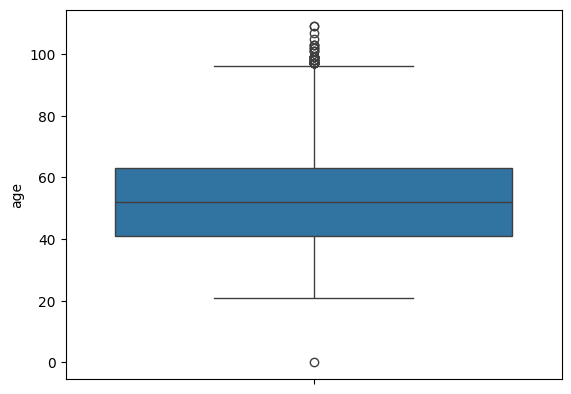

In [43]:
sn.boxplot(drop_rec['age'])

There are outliers in age too

In [44]:
drop_rec_age = drop_rec.drop(drop_rec[drop_rec['age']<1].index)

<Axes: ylabel='age'>

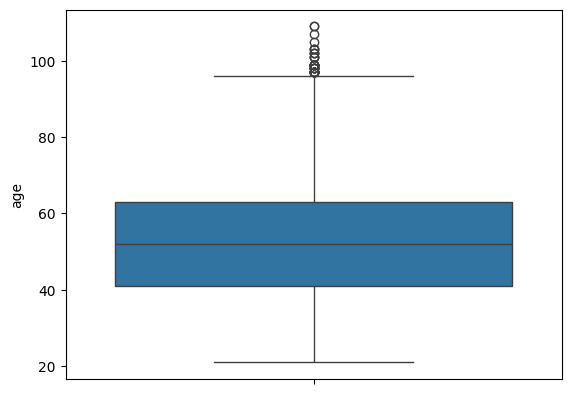

In [45]:
sn.boxplot(drop_rec_age['age'])

In [46]:
drop_rec_age.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

,0
NumberOfTime30-59DaysPastDueNotWorse,
0,125239
1,16019
2,4588
3,1750
4,747
5,342
6,140
7,54
8,25


There seems to be error in data because a customer can't default 96 times b/w 30-59 in last 2 yrs

In [47]:
drop_rec_age.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

,0
NumberOfTime60-89DaysPastDueNotWorse,
0,141600
1,5723
2,1117
3,318
4,104
5,34
6,16
7,8
8,2


In [48]:
drop_rec_age.groupby(['NumberOfTimes90DaysLate']).size()

,0
NumberOfTimes90DaysLate,
0,140874
1,5227
2,1554
3,666
4,291
5,131
6,80
7,38
8,20


The nearest lowest nos is 17 in all 3 variable

In [49]:
drop_rec_age[drop_rec_age['NumberOfTimes90DaysLate']>=96]['SeriousDlqin2yrs'].describe()

,SeriousDlqin2yrs
count,225.000000
mean,0.604444
std,0.490060
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [50]:
drop_rec_age[drop_rec_age['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,89
1,136


They mostly default

#We are going to treat this outliers with winsorising method
By bringing the largest value to nearest value in end sequence

Moving to next parameter

In [51]:
drop_rec_age['DebtRatio'].describe()

,DebtRatio
count,149149.000000
mean,354.087699
std,2042.242354
min,0.000000
25%,0.177333
50%,0.368196
75%,0.874244
max,329664.000000


<Axes: xlabel='DebtRatio', ylabel='Density'>

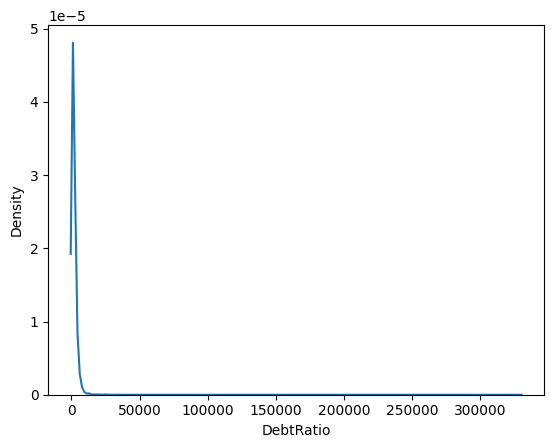

In [52]:
sn.kdeplot(drop_rec_age['DebtRatio'])

In [53]:
drop_rec_age['DebtRatio'].quantile([.975])

,DebtRatio
0.975,3492.0


In [54]:
drop_rec_age[drop_rec_age['DebtRatio']>3000].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,5226.000000,5226.000000,5226.000000,5226.000000,5226.00000,5226.000000,5226.000000,5226.00000,5226.000000,5226.000000,5226.000000
mean,0.058745,0.331203,53.583620,0.286070,5152.84424,4791.392652,11.118829,0.05377,2.116724,0.055492,0.508228
std,0.235169,0.346837,10.708151,0.790049,9331.11436,1707.810375,5.216998,0.38336,1.354969,0.304325,1.004692
min,0.000000,0.000000,25.000000,0.000000,3001.00000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.046310,46.000000,0.000000,3418.00000,5400.000000,7.000000,0.00000,1.000000,0.000000,0.000000
50%,0.000000,0.211233,54.000000,0.000000,4066.00000,5400.000000,10.000000,0.00000,2.000000,0.000000,0.000000
75%,0.000000,0.553449,61.000000,0.000000,5209.37500,5400.000000,14.000000,0.00000,2.000000,0.000000,1.000000
max,1.000000,6.425716,94.000000,10.000000,329664.00000,5400.000000,43.000000,11.00000,23.000000,5.000000,10.000000


In [55]:
drop_rec_age[drop_rec_age['DebtRatio']>3500].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,0.064777,0.343549,53.889339,0.301215,5938.804318,4799.517139,11.546019,0.053441,2.314980,0.054251,0.528205
std,0.246166,0.346104,10.536251,0.801565,10986.000878,1697.878039,5.386929,0.394830,1.496524,0.297622,1.024709
min,0.000000,0.000000,25.000000,0.000000,3501.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.047489,46.000000,0.000000,3975.000000,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.227493,54.000000,0.000000,4629.000000,5400.000000,11.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.584310,62.000000,0.000000,5800.000000,5400.000000,14.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,6.425716,94.000000,10.000000,329664.000000,5400.000000,43.000000,11.000000,23.000000,5.000000,10.000000


In [56]:
drop_rec_age[drop_rec_age['DebtRatio']>3000].groupby(drop_rec_age['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,4919
1,307


In [57]:
drop_rec_age[drop_rec_age['DebtRatio']>3500].groupby(drop_rec_age['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,3465
1,240


In [58]:
drop_rec_age['DebtRatio'].quantile([.975])

,DebtRatio
0.975,3492.0


In [59]:
drop_rec_age[drop_rec_age['DebtRatio']>3492][['SeriousDlqin2yrs']].describe()

,SeriousDlqin2yrs
count,3727.000000
mean,0.064395
std,0.245488
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [60]:
drop_rec_age[drop_rec_age['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [61]:
drop_rec_age[(drop_rec_age['DebtRatio']>3492) & (drop_rec_age['SeriousDlqin2yrs']==drop_rec_age['MonthlyIncome'])].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,0.005236,0.318318,53.526178,0.206806,6495.032723,0.005236,10.185864,0.028796,2.099476,0.036649,0.518325
std,0.072262,0.447572,11.322201,0.590081,12972.785207,0.072262,4.952744,0.182454,1.363395,0.214237,1.144852
min,0.000000,0.000000,26.000000,0.000000,3495.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030189,46.000000,0.000000,3956.250000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.183463,52.000000,0.000000,4607.500000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.501245,61.000000,0.000000,5580.750000,0.000000,13.000000,0.000000,3.000000,0.000000,0.000000
max,1.000000,6.425716,84.000000,4.000000,220516.000000,1.000000,31.000000,2.000000,15.000000,2.000000,10.000000


The value of record in income and default rate is same, maybe data error

In [62]:
temp = drop_rec_age[(drop_rec_age['DebtRatio']>3492) & (drop_rec_age['SeriousDlqin2yrs']==drop_rec_age['MonthlyIncome'])]

In [63]:
temp.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
844,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
3370,0,1.000000,45,0,9260.0,0.0,7,0,4,0,4.0


In [64]:
temp.groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,380
1,2


Most these are non defaulters so we can remove this data

In [65]:
drop_rec_dratio = drop_rec_age.drop(drop_rec_age[(drop_rec_age['DebtRatio']>3492) & (drop_rec_age['SeriousDlqin2yrs']==drop_rec_age['MonthlyIncome'])].index)

In [66]:
drop_rec_dratio.shape

(148767, 11)

In [67]:
drop_rec_dratio.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: xlabel='NumberRealEstateLoansOrLines', ylabel='Density'>

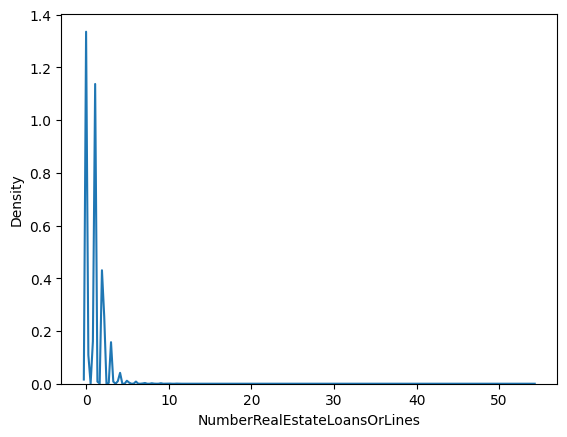

In [68]:
sn.kdeplot(drop_rec_dratio['NumberRealEstateLoansOrLines'])

<Axes: ylabel='NumberOfOpenCreditLinesAndLoans'>

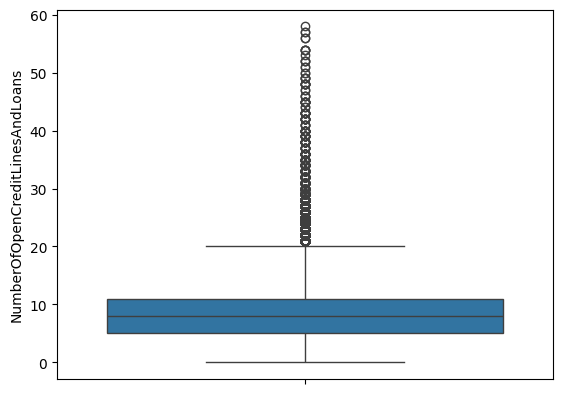

In [69]:
sn.boxplot(drop_rec_dratio['NumberOfOpenCreditLinesAndLoans'])

# **Modelling**

In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [76]:
model = XGBClassifier(tree_method = 'exact')

In [73]:
x = drop_rec_dratio.drop(['SeriousDlqin2yrs'],axis=1)
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [75]:
y = drop_rec_dratio['SeriousDlqin2yrs']
y.head()

,SeriousDlqin2yrs
0,1
1,0
2,0
3,0
4,0


In [78]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [79]:
accuracy_score(y,y_pred)

0.9471925897544482

In [81]:
cm = confusion_matrix(y,y_pred)

Text(50.722222222222214, 0.5, 'Actuals')

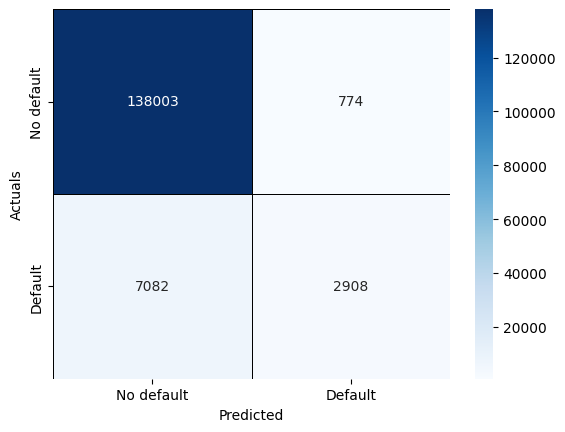

In [92]:
sn.heatmap(cm,annot=True,fmt='d',cmap='Blues',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No default','Default'])
plt.yticks(np.arange(2)+.5,['No default','Default'])
plt.xlabel("Predicted")
plt.ylabel("Actuals")

In [94]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138777
           1       0.79      0.29      0.43      9990

    accuracy                           0.95    148767
   macro avg       0.87      0.64      0.70    148767
weighted avg       0.94      0.95      0.94    148767

